# Wall Street Columns Nexa - Visualization of Code Vectors
In this notebook we will analyse the distribution of code vectors. What we want to analyse is whether we are able to increase that difference by making proper use of the code vectors. But we have gather quite an ammount of data so far and we need to concentrate, in order to decide which examples to analyse we put forward the following facts:

* For a couple of the examples gather so far we did obtain a **meaningful difference** between the predictions using mixed receptive field against the predictions using independent receptive fields in favor of the former. In particular we obtained the difference for the **same letter task with both policies and constant number of features**

* On the other hand for the raw data we did obtain an increase in prediction accuracy for **both the same and next letter task** but only if we use the **inclusive policy**. 

* Therefore the case that we will analyse is the inclusive policy for the same letter task and constant number of features. 

We want to check how the difference by using mixed receptive field increases compared to the difference that you get when going from the low to high resolution case. After that we want to test whether you can increase that gap by using more features in general and for that we check whether we are using appropriately most of the code vecotors. This last statement is what is shown here


In [1]:
import numpy as np
import h5py
%matplotlib inline

import sys
sys.path.append("../")

#### Let's load the file

In [2]:
# First we load the file 
file_location = '../results_database/text_wall_street_columns_30_semi_constantNdata.hdf5'
f = h5py.File(file_location, 'r')

#### Show the receptive fields first

In [3]:
Nembedding = 3
max_lag = 4
Nside = 30
Nspatial_clusters = max_lag
Ntime_clusters = 60 // max_lag

# Here calculate the scores for the mixes
run_name = '/test' + str(max_lag)


parameters_string = '/' + str(Nspatial_clusters)
parameters_string += '-' + str(Ntime_clusters)
parameters_string += '-' + str(Nembedding)

nexa = f[run_name + parameters_string]
cluster_to_index = nexa['cluster_to_index']
code_vectors_winner = np.array(nexa['code-vectors-winner'])

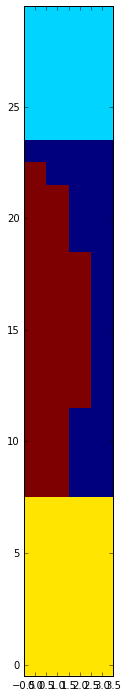

In [4]:
matrix = np.zeros((Nside, max_lag))

for cluster in cluster_to_index:
    
    cluster_indexes = cluster_to_index[str(cluster)]

    for index in cluster_indexes:
        first_index = index // max_lag
        second_index = index % max_lag
        matrix[first_index, second_index] = cluster

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.imshow(matrix, origin='lower', interpolation='none')

#### Show and histogram

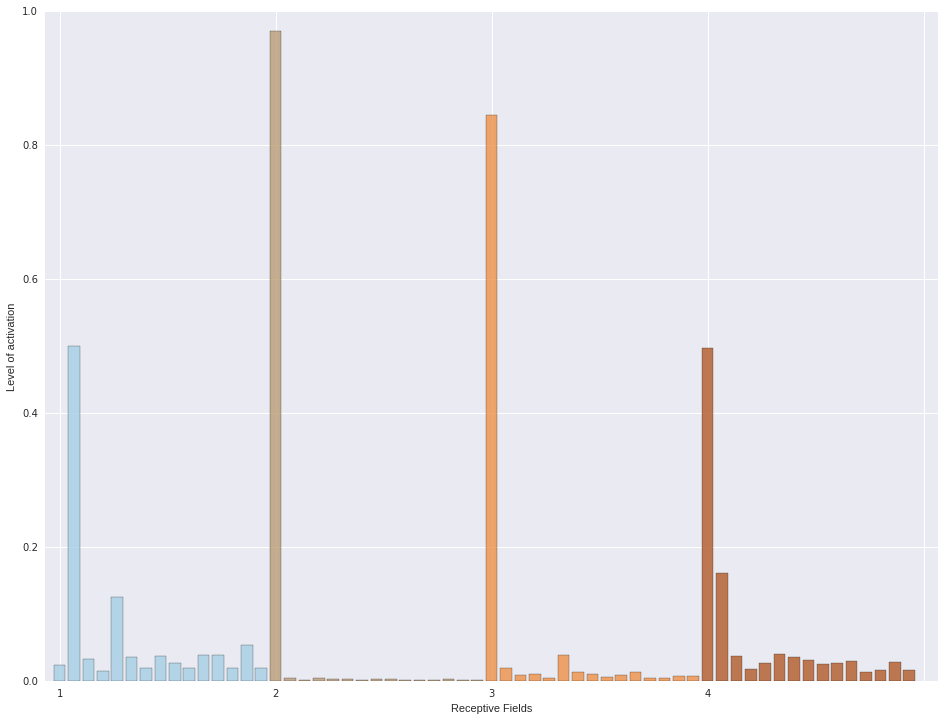

In [5]:
from visualization.code_vectors import visualize_representation_winners
visualize_representation_winners(code_vectors_winner, Nspatial_clusters, Ntime_clusters, ax=None)

#### Show the histograms

In [6]:
Nembedding = 3
max_lags = np.arange(2, 17, 2)


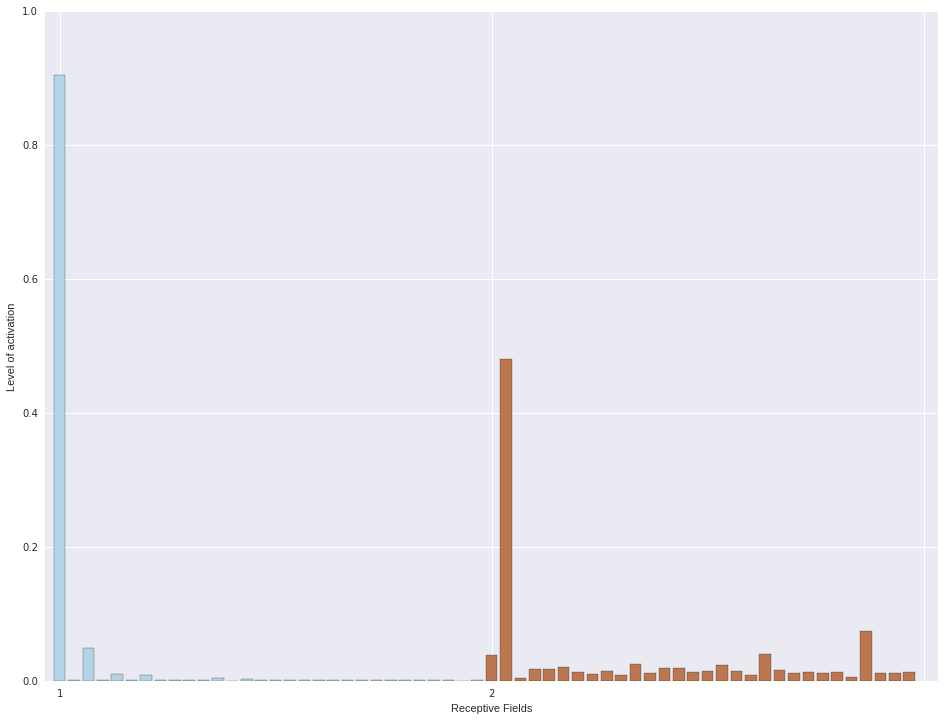

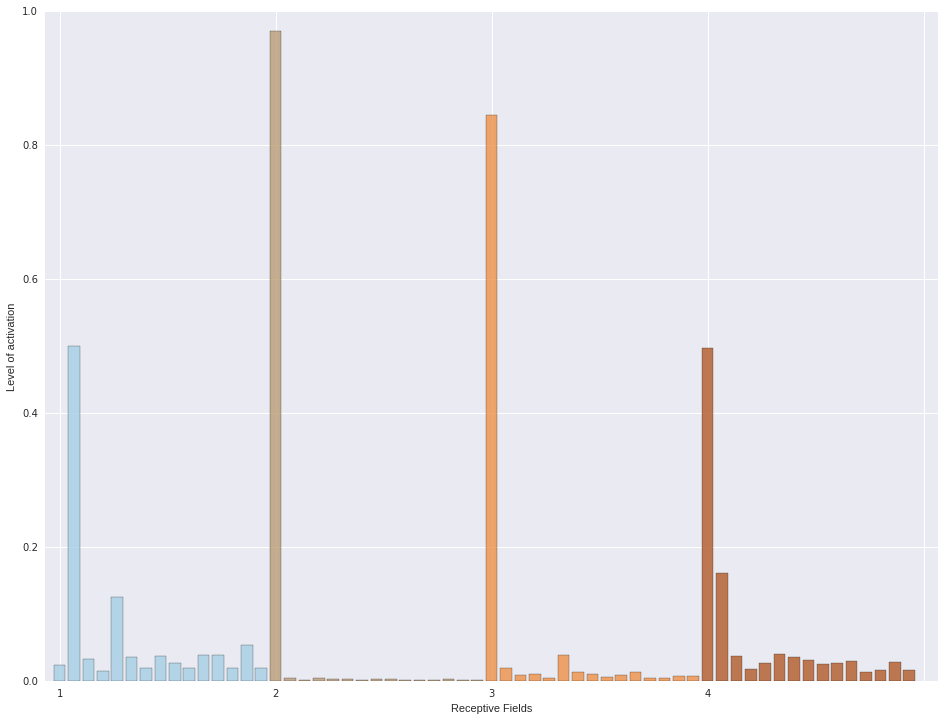

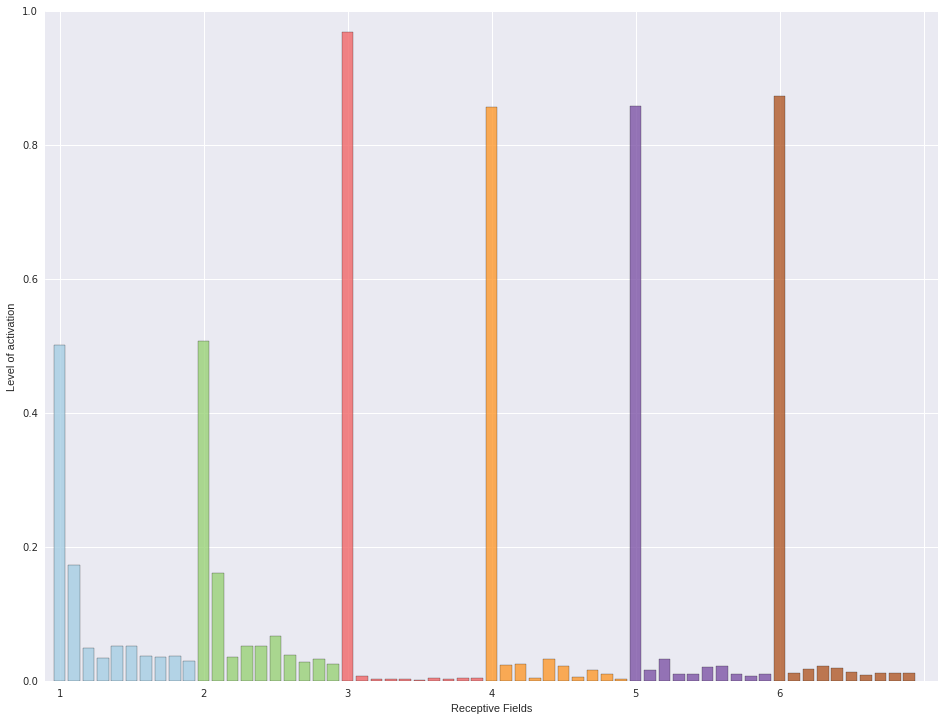

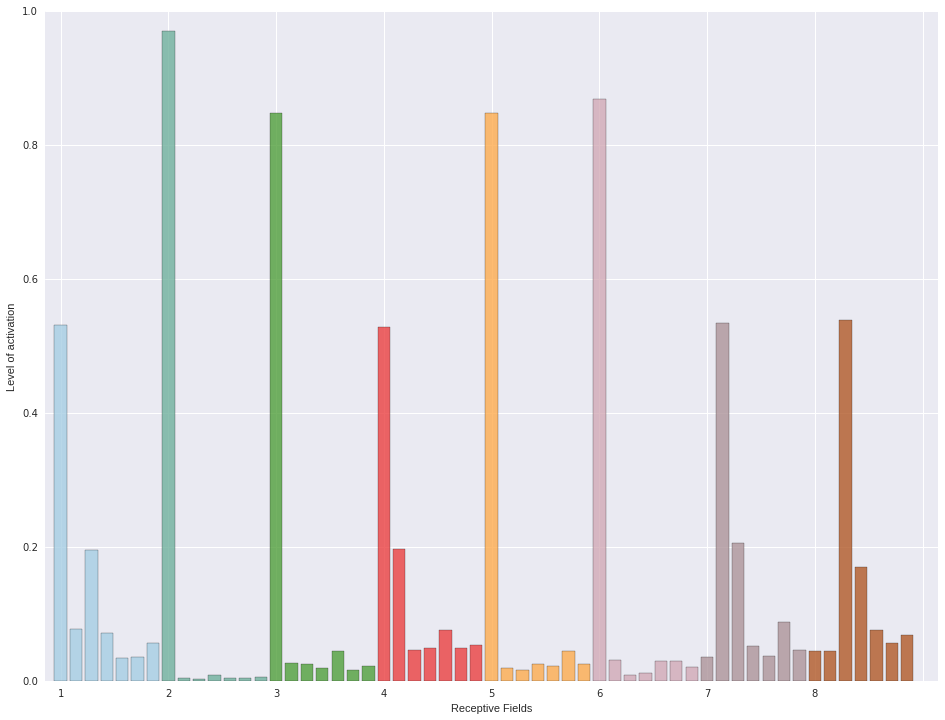

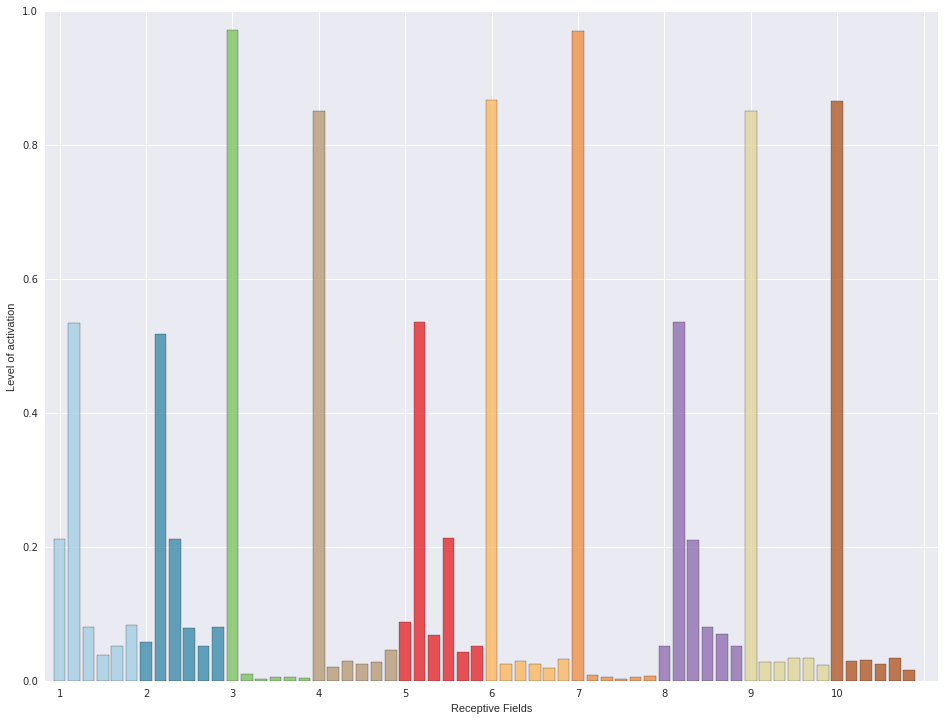

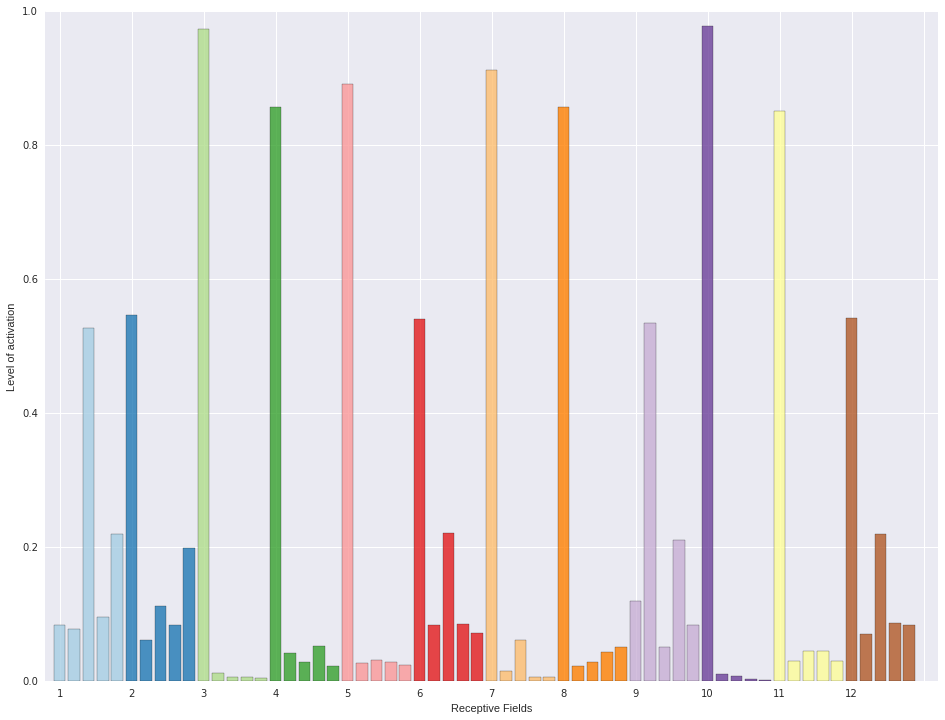

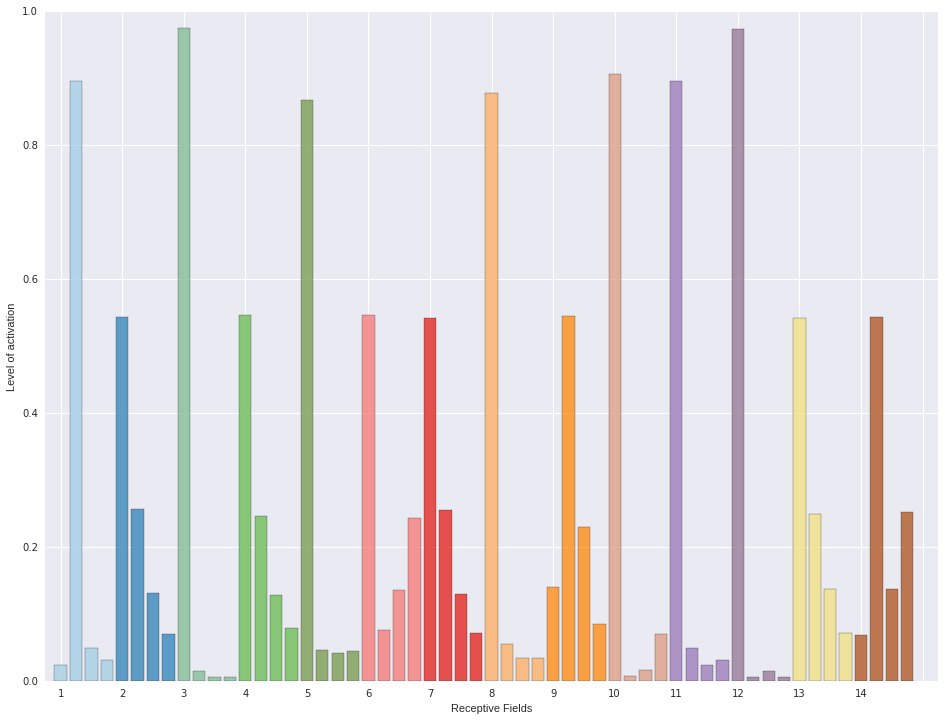

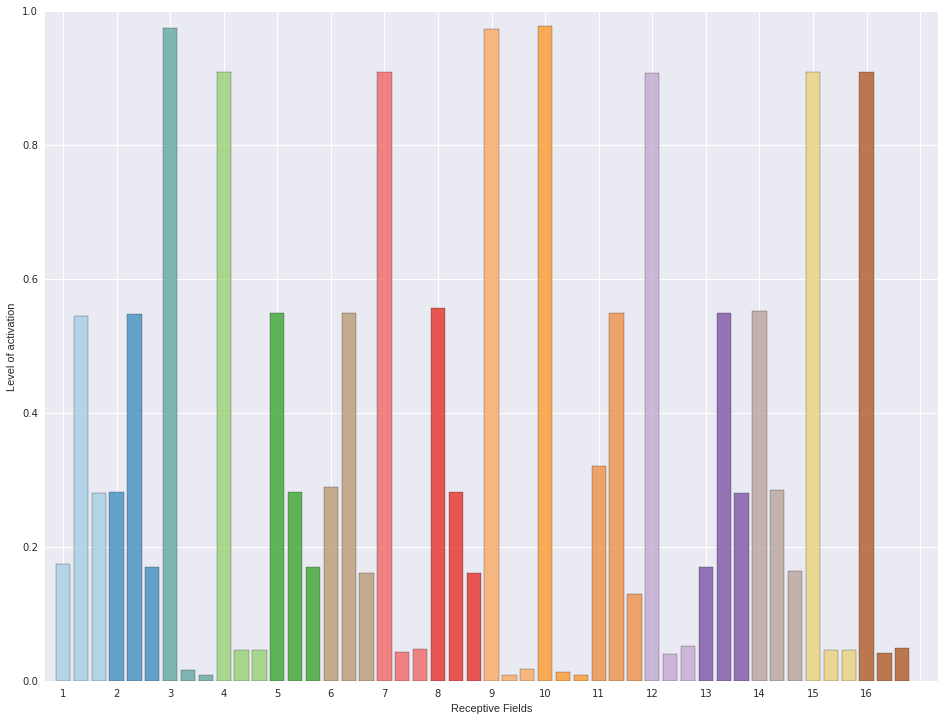

In [7]:
for max_lag in max_lags:
    Nspatial_clusters = max_lag
    Ntime_clusters = 60 // max_lag
    
    # Here calculate the scores for the mixes
    run_name = '/test' + str(max_lag)


    parameters_string = '/' + str(Nspatial_clusters)
    parameters_string += '-' + str(Ntime_clusters)
    parameters_string += '-' + str(Nembedding)

    nexa = f[run_name + parameters_string]
    cluster_to_index = nexa['cluster_to_index']
    code_vectors_softmax = np.array(nexa['code-vectors-softmax'])
    code_vectors_winner = np.array(nexa['code-vectors-winner'])

    visualize_representation_winners(code_vectors_winner, Nspatial_clusters, Ntime_clusters, ax=None)